In [1]:
%pip install pyfiglet
from pyfiglet import Figlet
f = Figlet(font='slant')
print(f.renderText( 'Sh!t Yeat Says'))


   _____ __    ____     __  __           __     _____                 
  / ___// /_  / / /_    \ \/ /__  ____ _/ /_   / ___/____ ___  _______
  \__ \/ __ \/ / __/     \  / _ \/ __ `/ __/   \__ \/ __ `/ / / / ___/
 ___/ / / / /_/ /_       / /  __/ /_/ / /_    ___/ / /_/ / /_/ (__  ) 
/____/_/ /_(_)\__/      /_/\___/\__,_/\__/   /____/\__,_/\__, /____/  
                                                        /____/        



## Sh!t Yeat Says | A Python NLP Deepdive 

In [2]:
YOUR_TOKEN = 'xxxxxxxxxx'

GENIUS_API_TOKEN = YOUR_TOKEN
%pip install requests
%pip install lyricsgenius
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import lyricsgenius
import requests

In [4]:
# this script uses a genius api token to get the lyrics of a song and then uses the lyricsgenius package to get the lyrics of the song by the artist
GENIUS_API_TOKEN = YOUR_TOKEN
genius = lyricsgenius.Genius(GENIUS_API_TOKEN)

In [5]:

artist = genius.search_artist("Yeat", sort="title")
print(artist.songs)

Searching for songs by Yeat...

Song 1: "105"
Song 2: "10 Bones"
Song 3: "1st Hunnid"
Song 4: "1st Off ...."
"1st thing 1st" is not valid. Skipping.
"24/7" is not valid. Skipping.
Song 5: "2day"
"2day (2aab)" is not valid. Skipping.
Song 6: "2 In"
Song 7: "2 Kut Off"
"2lite" is not valid. Skipping.
"2Much" is not valid. Skipping.
Song 8: "2 Up"
Song 9: "2 Up (Bad Boy Remix)"
Song 10: "2Wicë*"
Song 11: "2x2"
"3AM" is not valid. Skipping.
Song 12: "3AMM"
Song 13: "3G"
Song 14: "4LY (Trust Me)"
"5am On X Freestyle" is not valid. Skipping.
"5 Planës" is not valid. Skipping.
Song 15: "99% done"
"Actin Üp" is not valid. Skipping.
Song 16: "Addict In General"
Song 17: "Admit It"
Song 18: "Aftër*"
Song 19: "Again"
"Aight (One Life)*" is not valid. Skipping.
"Aint change shit" is not valid. Skipping.
"Aint ënough" is not valid. Skipping.
Song 20: "Ain’t nothing"
Song 21: "Aint Try (Tried Once)"
Song 22: "Aint Us"
Song 23: "Alien Language"
Song 24: "All 4 Nothin"
Song 25: "All daë"
"All fax" is 

In [6]:
'''Then, we want to create two lists, one for the song titles and one for the lyrics.
then we'll create a dictionary with the song titles as keys and the lyrics as values.
Next, using another package called pandas, we can load this data into a dataframe using the lists we created before.'''


title=[]
lyrics=[]
for i in range(len(artist)):
    title.append(artist.songs[i].title)
    lyrics.append(artist.songs[i].lyrics)  

In [7]:
import pandas as pd
df = pd.DataFrame({"Title":title, "Lyrics":lyrics})
df

,Title,Lyrics
0,105,105 LyricsPockets way to fat pockets way to (o...
1,10 Bones,"10 Bones Lyrics[Intro]\n(Mingo, haha)\n\n[Chor..."
2,1st Hunnid,"1st Hunnid Lyrics[Chorus]\nYeah, yeah, yeah, y..."
3,1st Off ....,"1st Off .... Lyrics[Intro]\nYeah, yeah (2Sided..."
4,2day,"2day Lyrics[Intro]\nYeah, Yeah\nDrink my kids ..."
...,...,...
417,X Krazy,X Krazy Lyrics[Intro]\nI gotta change my lifes...
418,X Still,X Still Lyrics[Intro]\n​​PinkGrillz\nTried to ...
419,X ta C,"X ta C Lyrics[Intro]\nUpside down T, this the ..."
420,X With The Boot Up,X With The Boot Up Lyrics[Intro]\nWake up then...


# We need to do some cleaning here....

### in the lyrics column there are some textual artifacts that we need to remove. These are the following:
#### verse, chorus, [chorus], [Intro], intro/Intro, and finally the song title that is repeated in the lyrics column 


In [8]:
df['Lyrics'] = df.apply(lambda x: x['Lyrics'].replace(x['Title'], ''), axis=1)
df2 = df
df2

,Title,Lyrics
0,105,LyricsPockets way to fat pockets way to (oh o...
1,10 Bones,"Lyrics[Intro]\n(Mingo, haha)\n\n[Chorus]\nLat..."
2,1st Hunnid,"Lyrics[Chorus]\nYeah, yeah, yeah, yeah\nI tou..."
3,1st Off ....,"Lyrics[Intro]\nYeah, yeah (2Sided goin' crazy..."
4,2day,"Lyrics[Intro]\nYeah, Yeah\nDrink my kids up\n..."
...,...,...
417,X Krazy,Lyrics[Intro]\nI gotta change my lifestyle\nI...
418,X Still,Lyrics[Intro]\n​​PinkGrillz\nTried to change ...
419,X ta C,"Lyrics[Intro]\nUpside down T, this the one th..."
420,X With The Boot Up,Lyrics[Intro]\nWake up then brush my teeth th...


In [9]:
df2['Lyrics'] = df2['Lyrics'].str.replace(r'\[.*\]', '')
df3 = df2
df3

C:\Users\kwaku\AppData\Local\Temp\ipykernel_9700\1960719113.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Lyrics'] = df2['Lyrics'].str.replace(r'\[.*\]', '')


,Title,Lyrics
0,105,LyricsPockets way to fat pockets way to (oh o...
1,10 Bones,"Lyrics\n(Mingo, haha)\n\n\nLate night, ridin'..."
2,1st Hunnid,"Lyrics\nYeah, yeah, yeah, yeah\nI touched a h..."
3,1st Off ....,"Lyrics\nYeah, yeah (2Sided goin' crazy)\nYeat..."
4,2day,"Lyrics\nYeah, Yeah\nDrink my kids up\nYeah, y..."
...,...,...
417,X Krazy,Lyrics\nI gotta change my lifestyle\nI'm gon'...
418,X Still,Lyrics\n​​PinkGrillz\nTried to change my ways...
419,X ta C,"Lyrics\nUpside down T, this the one that prot..."
420,X With The Boot Up,Lyrics\nWake up then brush my teeth then pick...


In [10]:
df3['Lyrics'] = df3['Lyrics'].str.replace('Lyrics', '')
df4 = df3
df4 

,Title,Lyrics
0,105,Pockets way to fat pockets way to (oh oh oh!)...
1,10 Bones,"\n(Mingo, haha)\n\n\nLate night, ridin' 'roun..."
2,1st Hunnid,"\nYeah, yeah, yeah, yeah\nI touched a hunnid ..."
3,1st Off ....,"\nYeah, yeah (2Sided goin' crazy)\nYeat, yeah..."
4,2day,"\nYeah, Yeah\nDrink my kids up\nYeah, yeah, y..."
...,...,...
417,X Krazy,\nI gotta change my lifestyle\nI'm gon' make ...
418,X Still,"\n​​PinkGrillz\nTried to change my ways, I'm ..."
419,X ta C,"\nUpside down T, this the one that protecting..."
420,X With The Boot Up,\nWake up then brush my teeth then pick them ...


In [11]:
# remove all variants of the word likeembed from the lyrics column
df4['Lyrics'] = df4['Lyrics'].str.replace('likeembed', '')
df5 = df4
df5

,Title,Lyrics
0,105,Pockets way to fat pockets way to (oh oh oh!)...
1,10 Bones,"\n(Mingo, haha)\n\n\nLate night, ridin' 'roun..."
2,1st Hunnid,"\nYeah, yeah, yeah, yeah\nI touched a hunnid ..."
3,1st Off ....,"\nYeah, yeah (2Sided goin' crazy)\nYeat, yeah..."
4,2day,"\nYeah, Yeah\nDrink my kids up\nYeah, yeah, y..."
...,...,...
417,X Krazy,\nI gotta change my lifestyle\nI'm gon' make ...
418,X Still,"\n​​PinkGrillz\nTried to change my ways, I'm ..."
419,X ta C,"\nUpside down T, this the one that protecting..."
420,X With The Boot Up,\nWake up then brush my teeth then pick them ...


In [12]:
#remove all variants of the word likeembed from the lyrics column
df5['Lyrics'] = df5['Lyrics'].str.replace('likeEmbed', '')
df6 = df5
df6

,Title,Lyrics
0,105,Pockets way to fat pockets way to (oh oh oh!)...
1,10 Bones,"\n(Mingo, haha)\n\n\nLate night, ridin' 'roun..."
2,1st Hunnid,"\nYeah, yeah, yeah, yeah\nI touched a hunnid ..."
3,1st Off ....,"\nYeah, yeah (2Sided goin' crazy)\nYeat, yeah..."
4,2day,"\nYeah, Yeah\nDrink my kids up\nYeah, yeah, y..."
...,...,...
417,X Krazy,\nI gotta change my lifestyle\nI'm gon' make ...
418,X Still,"\n​​PinkGrillz\nTried to change my ways, I'm ..."
419,X ta C,"\nUpside down T, this the one that protecting..."
420,X With The Boot Up,\nWake up then brush my teeth then pick them ...


In [13]:
# remove all words that end in embed or Embed from the lyrics column
df6['Lyrics'] = df6['Lyrics'].str.replace(r'embed$', '')
df7 = df6
df7

C:\Users\kwaku\AppData\Local\Temp\ipykernel_9700\2068483953.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Lyrics'] = df6['Lyrics'].str.replace(r'embed$', '')


,Title,Lyrics
0,105,Pockets way to fat pockets way to (oh oh oh!)...
1,10 Bones,"\n(Mingo, haha)\n\n\nLate night, ridin' 'roun..."
2,1st Hunnid,"\nYeah, yeah, yeah, yeah\nI touched a hunnid ..."
3,1st Off ....,"\nYeah, yeah (2Sided goin' crazy)\nYeat, yeah..."
4,2day,"\nYeah, Yeah\nDrink my kids up\nYeah, yeah, y..."
...,...,...
417,X Krazy,\nI gotta change my lifestyle\nI'm gon' make ...
418,X Still,"\n​​PinkGrillz\nTried to change my ways, I'm ..."
419,X ta C,"\nUpside down T, this the one that protecting..."
420,X With The Boot Up,\nWake up then brush my teeth then pick them ...


In [14]:
# remove all words that end in embed or Embed from the lyrics column
df7['Lyrics'] = df7['Lyrics'].str.replace(r'Embed$', '')
df8 = df7
df8

C:\Users\kwaku\AppData\Local\Temp\ipykernel_9700\1663686156.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df7['Lyrics'] = df7['Lyrics'].str.replace(r'Embed$', '')


,Title,Lyrics
0,105,Pockets way to fat pockets way to (oh oh oh!)...
1,10 Bones,"\n(Mingo, haha)\n\n\nLate night, ridin' 'roun..."
2,1st Hunnid,"\nYeah, yeah, yeah, yeah\nI touched a hunnid ..."
3,1st Off ....,"\nYeah, yeah (2Sided goin' crazy)\nYeat, yeah..."
4,2day,"\nYeah, Yeah\nDrink my kids up\nYeah, yeah, y..."
...,...,...
417,X Krazy,\nI gotta change my lifestyle\nI'm gon' make ...
418,X Still,"\n​​PinkGrillz\nTried to change my ways, I'm ..."
419,X ta C,"\nUpside down T, this the one that protecting..."
420,X With The Boot Up,\nWake up then brush my teeth then pick them ...


In [15]:
df8.to_csv("lyrics.csv", index= False)

# Let's make a wordcloud!

In [16]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kwaku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kwaku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kwaku\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kwaku\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\kwaku\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kwaku\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

True

In [18]:
text = df8.Lyrics
text = text.str.cat(sep=' ')
text = text.lower()
text = word_tokenize(text)
text = [word for word in text if word.isalpha()]
stop_words = set(stopwords.words('english'))
text = [w for w in text if not w in stop_words]
text = [word for word in text if len(word) > 2]
text = Text(text)

In [19]:
#pip3 install --upgrade tensorflow-gpu --user

In [20]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


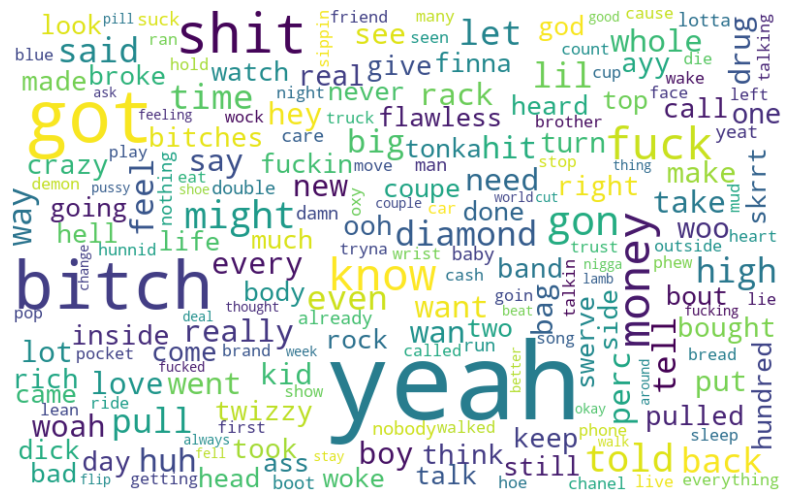

In [21]:
#create a word cloud remove repeated words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white', collocations=False).generate(' '.join(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [22]:
#put the 10 most common words in lyrics in a dataframe   
fdist = FreqDist(text)
fdist.most_common(10)
comword = pd.DataFrame(fdist.most_common(10), columns=['Word', 'Frequency'])
comword

,Word,Frequency
0,yeah,6733
1,got,2379
2,bitch,2058
3,like,1778
4,shit,1274
5,get,1058
6,money,862
7,know,812
8,fuck,809
9,gon,662


In [23]:
#convert comword into a dictionary
comword_dict = comword.set_index('Word').T.to_dict('records')
comword_dict

[{'yeah': 6733,
  'got': 2379,
  'bitch': 2058,
  'like': 1778,
  'shit': 1274,
  'get': 1058,
  'money': 862,
  'know': 812,
  'fuck': 809,
  'gon': 662}]

['yeah', 'got', 'bitch', 'like', 'shit', 'get', 'money', 'know', 'fuck', 'gon']
[6733, 2379, 2058, 1778, 1274, 1058, 862, 812, 809, 662]


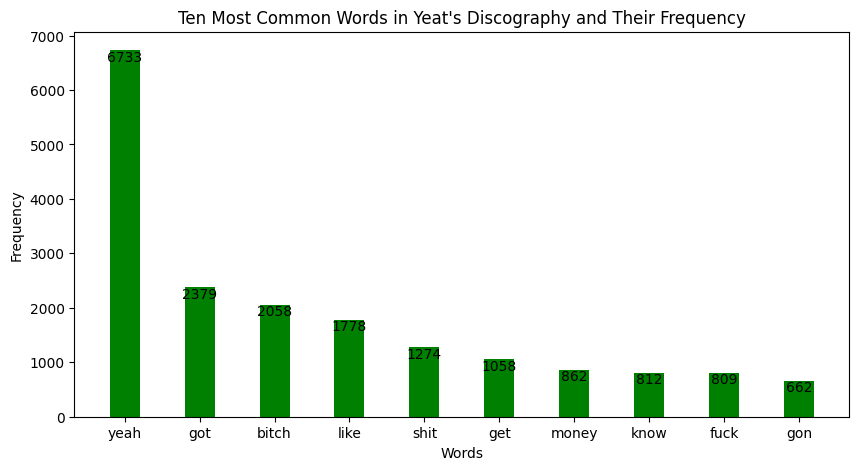

In [24]:
Lyrics = list(comword_dict[0].keys())
Values = list(comword_dict[0].values())

print (Lyrics)
print (Values)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Lyrics, Values, color ='Green',
        width = 0.4)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Ten Most Common Words in Yeat's Discography and Their Frequency")

# This code annotates the bars with the frequency of the words
for index,data in enumerate(Values):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10), ha='center', va='top', color='black')
plt.show()

## YEAT-ISMS

In [31]:
# bi-grams
from nltk.util import ngrams
from collections import Counter
n = 2
bigrams = ngrams(text, n)
Counter(bigrams).most_common(10)


[(('yeah', 'yeah'), 1034),
 (('might', 'also'), 421),
 (('yeah', 'got'), 251),
 (('also', 'like'), 193),
 (('feel', 'like'), 189),
 (('every', 'time'), 160),
 (('yeah', 'bitch'), 159),
 (('lil', 'bitch'), 138),
 (('whole', 'lot'), 125),
 (('big', 'body'), 125)]

In [41]:
# tri-grams                          
n = 3
trigrams = ngrams(text, n)
Counter(trigrams).most_common(10)


[(('yeah', 'yeah', 'yeah'), 272),
 (('might', 'also', 'like'), 193),
 (('woah', 'woah', 'woah'), 49),
 (('yeah', 'might', 'also'), 44),
 (('yeah', 'yeah', 'got'), 40),
 (('also', 'like', 'yeah'), 40),
 (('might', 'also', 'yeah'), 39),
 (('flip', 'flip', 'flip'), 36),
 (('swerve', 'swerve', 'swerve'), 31),
 (('hey', 'hey', 'hey'), 29)]

Based off of the text in Yeat's discography, 
create a script that randomly generates a 10 word sentence.

In [53]:
import random
def generate_sentence():
    sentence = []
    for i in range(10):
        sentence.append(random.choice(text))
    return ' '.join(sentence)
generate_sentence()

'probably ever think could make yeah pockets stop back chanelly'